Ахмадуллин Азат БПМ184


# 1

i) $$I_n(\alpha) = \int_0^1 \frac{x^n}{x + \alpha}dx = \int_0^1 \frac{x^{n - 1}(x + \alpha) - x^{n - 1}\alpha}{x + \alpha}dx = \int_0^1 x^{n-1} dx - \int_0^1 \frac{x^{n - 1} \alpha}{x + \alpha} dx = \frac{1}{n} x^n |_0^1 - \alpha I_n = \frac{1}{n} - \alpha I_{n - 1}(\alpha)$$

Получим

$$I_n(\alpha) = \frac{1}{n} - \alpha I_{n - 1}(\alpha)$$

ii) $$I_0(\alpha) = \int_0^1 \frac{1}{x + \alpha} dx = \ln{(x + \alpha)}|_0^1 = \ln{(\alpha + 1)} - \ln{(\alpha)} = \ln{(\frac{\alpha + 1}{\alpha})} = \ln{(1 + \frac{1}{\alpha})}$$

In [1]:
import numpy as np
def rec_up(n, alpha):
    if n == 0:
        return np.log(1 + 1/alpha)
    else:
        return 1/n - alpha * rec_up(n - 1, alpha)

Прямая рекурсия:

In [2]:
print("I_25(0.1) =", rec_up(25, 0.1))
print("I_25(10)  =", rec_up(25, 10))

I_25(0.1) = 0.03622697090911682
I_25(10)  = -748346367.4013903


$$I_{n - 1}(\alpha) = \frac{1}{\alpha n} - \frac{1}{\alpha} I_n(\alpha)$$

In [3]:
def rec_down(n, alpha):
    if n == N:
        return 0
    else:
        return (1 / n - rec_down(n + 1, alpha)) / alpha

In [4]:
N = 25
x1 = [0] * (N )
for i in range(N - 1, 0, -1):
    x1[i - 1] = rec_down(i, 10)
x2 = [0] * N
for i in range(N):
    x2[i] = rec_up(i, 10)

print("Результат для alpha = 10")
print('{:>50s} {:>50s}'.format("up", "down"))
for i in range(N):
    print('{:25.15f} {:25.15f}'.format(x2[i], x1[i]))

Результат для alpha = 10
                                                up                                               down
        0.095310179804325         0.095310179804325
        0.046898201956751         0.046898201956751
        0.031017980432493         0.031017980432486
        0.023153529008398         0.023153529008473
        0.018464709916015         0.018464709915267
        0.015352900839845         0.015352900847329
        0.013137658268212         0.013137658193377
        0.011480560175024         0.011480560923370
        0.010194398249764         0.010194390766300
        0.009167128613475         0.009167203448111
        0.008328713865254         0.008327965518886
        0.007621952256554         0.007629435720228
        0.007113810767796         0.007038976131052
        0.005784969245117         0.006533315612559
        0.013578878977397         0.006095415302983
       -0.069122123107305         0.005712513636834
        0.753721231073049         0.00537

In [5]:
N = 25
x3 = [0] * (N)
for i in range(N - 1, 0, -1):
    x3[i - 1] = rec_down(i, 0.1)
x4 = [0] * N
for i in range(N):
    x4[i] = rec_up(i, 0.1)

print("Результат для alpha = 0.1")
print('{:>50s} {:>50s}'.format("up", "down"))
for i in range(N):
    print('{:50.15f} {:50.15f}'.format(x4[i], x3[i]))

Результат для alpha = 0.1
                                                up                                               down
                                 2.397895272798371           -37730290908831745572864.000000000000000
                                 0.760210472720163             3773029090883174662144.000000000000000
                                 0.423978952727984             -377302909088317505536.000000000000000
                                 0.290935438060535               37730290908831752192.000000000000000
                                 0.220906456193946               -3773029090883175424.000000000000000
                                 0.177909354380605                 377302909088317568.000000000000000
                                 0.148875731228606                 -37730290908831760.000000000000000
                                 0.127969569734282                   3773029090883176.000000000000000
                                 0.112203043026572      

Для альфа равного 10 прямая рекурсия плохо подходит, так как ошибка при вычислениях умножается на каждом шаге на альфу. При обратном подходе наоборот она гасится делением на альфу.

Поэтому при альфе равной 10 лучше подходит прямая рекурсия, а при альфе равной 0.1 обратная.

# 4 

$$\sum_{k=1}^{3000} k^{-2} \approx 1.6446$$

Так происходит, потому что при больших k члены ряда становятся много меньше первых членов. При суммировании сначала, в дальнейшем с какого-то k члены могут перестать влиять на сумму, обрезаться.

Более удачным способом суммирования является суммирование сначала маленьких членов, то есть с конца, для того, чтобы их сумма впоследствии стала сравнимой с большими по величине членами ряда.

In [6]:
import math

def round_to_n(x, n):
    if x == 0:
        return x
    else:
        return round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))

Прямой порядок суммирования

In [7]:
res_forward = 0
for k in range(1, 3001):
    res_forward = round_to_n(res_forward + 1/k**2, 4)
print(res_forward)

1.624


Обратный порядок

In [8]:
res = 0
for k in range(3000 , 0, -1):
    res = round_to_n(res + 1 / k**2, 4)
print(res)

1.645


После такого способа суммирования получили более точный ответ.

# 5

$$F = G\frac{M_1 M_2}{r^2}$$ 

$M_1 = 40 \times 10^4 \pm 0.05 \times 10^4 kg$

$M_2 = 30 \times 10^4 \pm 0.1 \times 10^4 kg$

$r = 3.2 \pm 0.01 m$

a) 
$$ F(M_1, M_2, r) = F(\overline M_1, \overline M_2, \overline r) + F'_{M_1}(\overline M_1, \overline M_2, \overline r)
\times \varepsilon_1 + F'_{M_2}(\overline M_1, \overline M_2, \overline r) \times \varepsilon_2 + F'_r(\overline M_1, \overline M_2, \overline r) \varepsilon_3 $$

$$F'_{M_1} = \frac{G M_2}{r^2}$$

$$F'_{M_2} = \frac{G M_1}{r^2}$$

$$F'_r = G\frac{-2 M_1 M_2}{r^3}$$

Значение силы:

$F(\overline M_1, \overline M_2, \overline r) = G\frac{40 \cdot 30 \times 10^8}{3.2^2} = G\frac{1200 \times 10^8}{10.24}$

Погрешность:

$\Delta F = \frac{G \overline M_2}{\overline r^2} \cdot \varepsilon_1  + \frac{G \overline M_1}{\overline r^2} \cdot \varepsilon_2 + G\frac{-2 \overline M_1 \overline M_2}{\overline r^3} \cdot \varepsilon_3 = \frac{G}{\overline r^2}(\overline M_2 \cdot \varepsilon_1 + \overline M_1 \cdot \varepsilon_2 - \frac{2 \overline M_1 \overline M_2}{\overline r} \cdot \varepsilon_3) = \frac{G}{10.24}(30 \times 10^4 \cdot 0.05 \times 10^4 + 40 \times 10^4 \cdot 0.1 \times 10^4 - \frac{2 \cdot 1200 \times 10^8}{3.2} \cdot 0.01) = \frac{G}{10.24}(1.5 \times 10^8 + 4 \times 10^8 - 7.5 \times 10^8) = -\frac{2 G}{10.24} \times 10^8 = $ 

$= -\frac{G}{5.12} \times 10^8$

In [9]:
from scipy.constants import G

m1 = 40 * 1e4
eps1 = 0.05 * 1e4
m2 = 30 * 1e4
eps2 = 0.1 * 1e4
r = 3.2
eps3 = 0.01

In [10]:
def F(m1, m2, r):
    return G*m1*m2 / r**2

In [11]:
F(m1, m2, r)

0.7821445312499998

In [12]:
def dF_dM1(m2, r):
    return G * m2 / r**2
def dF_dM2(m1, r):
    return G * m1 / r**2
def dF_dR(m1, m2, r):
    return -2*G*m1*m2 / r**3
def delta_F(m1, m2, r, eps1, eps2, eps3):
     return abs(dF_dM1(m2, r) * eps1 + dF_dM2(m1, r) * eps2 + dF_dR(m1, m2, r) * eps3)
delta_F(m1, m2, r, eps1, eps2, eps3)

0.00130357421875

In [13]:
#b
from numpy.random import normal


m1_vals = normal(m1, eps1, 10**5)
m2_vals = normal(m2, eps2, 10**5)
r_vals = normal(r, eps3, 10**5)
F_vals = [F(m1_vals[i], m2_vals[i], r_vals[i]) for i in range(10**5)]

$F \sim N(F(\overline M_1, \overline M_2, \overline r), F'^2_{M_1} \cdot \varepsilon_1^2 + F'^2_{M_2} \cdot \varepsilon_2^2 + F'^2_{r} \cdot \varepsilon_3^2)$

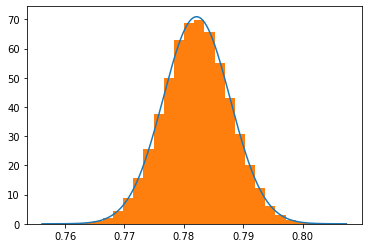

In [14]:
#c
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from math import sqrt
    
F_mean = F(m1, m2, r)
F_std = sqrt(dF_dM1(m2, r)**2 * eps1**2 + dF_dM2(m1, r)**2 * eps2**2  + dF_dR(m1, m2, r)**2 * eps3**2)
x = np.linspace(min(F_vals), max(F_vals), 1000)
y = stats.norm.pdf(x, F_mean, F_std)

plt.plot(x, y)

plt.hist(F_vals, 30, density = True)
plt.show()

Результаты получились согласованными. Получается, что можно хорошо лианеризовать функцию для таких погрешностей

In [15]:
#d
M1 = m1
Eps1 = 2 * 1e4
M2 = m2
Eps2 = 10 * 1e4
R = r
Eps3 = 1.

F(M1, M2, R)

0.7821445312499998

In [16]:
delta_F(M1, M2, R, Eps1, Eps2, Eps3)

0.1890182617187499

In [17]:
from numpy.random import normal


M1_vals = normal(M1, Eps1, 10**5)
M2_vals = normal(M2, Eps2, 10**5)
R_vals = normal(R, Eps3, 10**5)
F1_vals = [F(M1_vals[i], M2_vals[i], R_vals[i]) for i in range(10**5)]

(array([9.9997e+04, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

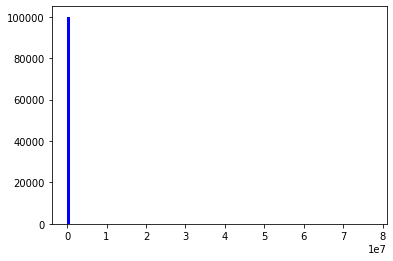

In [20]:
plt.hist(F1_vals, 100, density = False, color='blue')

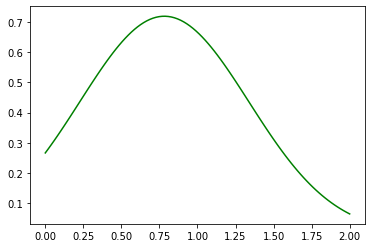

In [19]:
F1_mean = F(M1, M2, R)
F1_std = sqrt(dF_dM1(M2, R)**2 * Eps1**2 + dF_dM2(M1, R)**2 * Eps2**2 + dF_dR(M1, M2, R)**2 * Eps3**2)
X = np.linspace(0, 2, 100)
Y = stats.norm.pdf(X, F1_mean, F1_std)

plt.plot(X, Y, color = 'green')

plt.show()

Для данных погрешностей недостаточно первого порядка приближения, такие данные невозможно представить суммой нормальных распределений.